<a href="https://colab.research.google.com/github/srb7600/Computer-Vision/blob/main/CA3_Assignment_L00157097.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

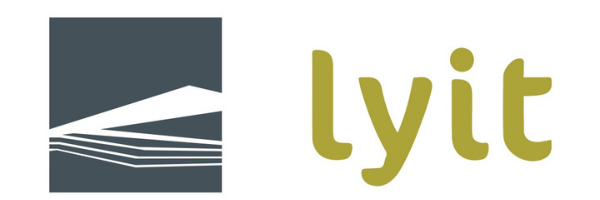

# **ARTIFICIAL INTELLIGENCE 2 - CA ASSIGNMENT 3**
## **Name:** Kumar Saurabh
## **Course:** MSc in Big Data Analytics and Artificial Intelligence
## **Institute:** Letterkenny Institute of Technology
## **Student ID:** L00157097
## **Student Email:** l00157097@student.lyit.ie
## **Professor:** Dr. Kevin Meehan



###**COMPLETED THE PRACTICAL ASSESSMENT IN GOOGLE COLAB AS WAS FACING SOME ISSUES WHILE IMPORTING LIBRARIES IN JUPYTER NOTEBOOK**

###**--> Majority of the codes in this notebook has been implemented from the AI2 lectures however, I have taken help from some of the useful websites such as [OpenCV](https://opencv.org), [Real Python](https://realpython.com) and [Medium](https://medium.com).**

###**I have saved all the files for this code in a folder naming CA3 Files.**
###**Anyone who is running this code just need to extract the zip file and save the CA3 Files folder in My Drive of Google Drive.**
###**Further we only need to change the number in every code block to compare the txt extracted from an image file with the txt file associated with that image file**

###**The Table for the comparison of various techniques used in different class is attached in the end.**

###**The first step would be to import the required libraries. We will import few libraries later when required in different code blocks.**

In [ ]:
#Import required libraries
!pip install pytesseract
!pip install tesseract
!pip install pdf2image
!apt-get install poppler-utils
!apt install tesseract-ocr
!apt install libtesseract-dev
!sudo apt install tesseract-ocr
!pip install Pillow
from PIL import Image
import pytesseract
from pdf2image import convert_from_path
from google.colab.patches import cv2_imshow
import cv2
import sys
import os 
import numpy as np

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=553fb4e369819ddeb32df757fadafe4c3528c782c856d431a78accd0214663f9
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
     |████████████████████████████████| 45.6MB 94kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp37-none-any.whl size=45562571 sha256=ad145e12a18192ea9195015d05464c07162667f153703bfaa72403d7197d84e0
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not 

###**I will use the loop method taught in the AI lectures to convert PDF to Image files and after that we will proceed further for pre-processing.**

###**NOTE:** I have divided all the 50 Images in 4 different classes namely CLASS 1, CLASS 2, CLASS 3 and CLASS 4 based on their region of extraction.

###**In each class I have used 9 techniques:**
###1. No Grayscaling
###2. Grayscaling and Adaptive Thresholding
###3. Erosion
###4. Dilation
###5. Contour
###6. Gaussian 
###**Three forms of Edge Detection** 
###7a. Canny
###7b. Laplacian
###7c. Sobel

# **CLASS 1**

### This code block consists of different 12 Files. So, the numbers should vary between 1-12 for txt comparison.


In [ ]:
#In this section we will convert the PDF files to JPEG format.

#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

#Now we will run a loop which will find all image files with name Class1Pdf and convert it into jpeg format
for x in range(12):
  PDF_file = ("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Pdf" + str(x+1) + ".pdf")
  pages = convert_from_path(PDF_file, 500, single_file=True)
  pages[0].save("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Img" + str(x+1), 'JPEG') # This line will save the Files to same location or the location defined


Mounted at /content/gdrive


In [ ]:
# In this code block, we will take Images one by one and extract ROI as required.

for x in range(12):
  img1 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1Img' + str(x+1), cv2.IMREAD_UNCHANGED)

  #Extracting "Bill of Materials" from Images for Class 1
  roi1 = img1[0:img1.shape[0]-2900,5400:img1.shape[1]-250]  #The coordinates needs to be changed for every class

  #Saving Pre-processed ROI for Class 1
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) + '.jpg', roi1) #This line of code will save exracted ROI in jpg format with name Class1ImgROI one by one

###**TECHNIQUE 1 - NO GRAYSCALING OR BINARIZATION**

In [ ]:
for x in range(12):
  img1_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) + '.jpg')

  #Adding custom options
  custom_config = r'--oem 3 --psm 6'

  h, w, c = img1_new.shape
  boxes = pytesseract.image_to_boxes(img1_new) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img1_new = cv2.rectangle(img1_new, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 255), 2) #OpenCV is in Blue, Green, Red format.

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1NGB' + str(x+1) + '.jpg', img1_new)

  #cv2_imshow(img1_new) -> I have commented this line as this will only give output of the last image processed.

In [ ]:
# Taking an image file and converting it into text form to compare with another txt file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1NGB1" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1NGB1.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1NGB1.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt1.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.10193548387096774

###**TECHNIQUE 2 - GRAYSCALE AND ADAPTIVE THRESHOLDING**

In [ ]:
for x in range(12):
  img1_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) + '.jpg')
  img1grayscale_new = cv2.cvtColor(img1_new,cv2.COLOR_BGR2GRAY)
  img1_thresh = cv2.adaptiveThreshold(img1grayscale_new,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,4)

  h, w = img1_thresh.shape
  boxes = pytesseract.image_to_boxes(img1_thresh) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img1_new = cv2.rectangle(img1_thresh, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2) #OpenCV is in Blue, Green, Red format.

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1Gray' + str(x+1) + '.jpg', img1_new)

In [ ]:
# Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Gray5" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Gray5.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Gray5.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt5.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.7318109399893786

###**TECHNIQUE 3 - EROSION**

In [ ]:
for x in range(12):
  img1_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_UNCHANGED)
  img_gray = cv2.cvtColor(img1_new,cv2.COLOR_BGR2GRAY)
  kernel = np.ones((1,1),np.uint8)
  img_eros = cv2.erode(img_gray,kernel,iterations = 2)
  h, w = img_eros.shape
  boxes = pytesseract.image_to_boxes(img_eros) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img1_new = cv2.rectangle(img_eros, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (205, 10, 90), 3)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1Eros' + str(x+1) +'.jpg', img1_new)

In [ ]:
# Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Eros7" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Eros7.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Eros7.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt7.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.34843982169390786

###**TECHNIQUE 4 - DILATION**

In [ ]:
for x in range(12):
  img1 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)  
  kernel = np.ones((1,1), np.uint8)  
  img_eros = cv2.erode(img1, kernel, iterations=2)  
  img_dil = cv2.dilate(img_eros, kernel, iterations=2)   
                             
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1Dil' + str(x+1) +'.jpg', img_dil)        

In [ ]:
# Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Dil10" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Dil10.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Dil10.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt10.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.3940942646223736

###**TECHNIQUE 5 - CONTOUR DETECTION**

In [ ]:
for x in range(12):
  img1 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) +'.jpg', cv2.IMREAD_UNCHANGED)

  img_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Detect the contours on the binary image 
  contours, hierarchy = cv2.findContours(image=img_thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
  #Draw contours on the original image
  img1_copy = img1.copy()
  cv2.drawContours(image=img1_copy, contours=contours, contourIdx=-1, color=(0, 255, 255), thickness=5, lineType=cv2.LINE_AA)

  h, w, c = img1_copy.shape
  boxes = pytesseract.image_to_boxes(img1_copy) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img1_copy = cv2.rectangle(img1_copy, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1Cont' + str(x+1) +'.jpg', img1_copy)

In [ ]:
# Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Cont11" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Cont11.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Cont11.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt11.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.04630454140694568

###**TECHNIQUE 6 - GAUSSIAN BLUR**

In [ ]:
#GAUSSIAN BLUR
for x in range(12):
  img1 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) + '.jpg')
  img_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  img1 = cv2.GaussianBlur(img_thresh, (7, 5), 6)     #Remove the noise in image
  h, w = img1.shape
  boxes = pytesseract.image_to_boxes(img1) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img1 = cv2.rectangle(img1, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2)
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1Gaus' + str(x+1) + '.jpg', img1)

In [ ]:
# Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Gaus9" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Gaus9.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Gaus9.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt9.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.15361670395227442

###**TECHNIQUE 7a - EDGE DETECTION - CANNY**

In [ ]:
#Edge Detection
for x in range(12):
  img1 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) + '.jpg')
  img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 10, 205, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Perform the canny edge technique to detect txt edges
  edges = cv2.Canny(img_thresh, threshold1=230, threshold2=250) #The value of threshold can be changed to get different results
  h, w = edges.shape
  boxes = pytesseract.image_to_boxes(edges) 
  for b in boxes.splitlines():
      b = b.split(' ')
      edges = cv2.rectangle(edges, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 255), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1Cann' + str(x+1) + '.jpg', edges)

In [ ]:
# Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Cann6" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Cann6.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Cann6.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt6.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.05142537730575741

###**TECHNIQUE 7b - EDGE DETECTION - LAPLACIAN**

In [ ]:
for x in range(12):
  img1 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR) # Load an image
  img_gb = cv2.GaussianBlur(img1, (0, 0), 5)
  img_gray = cv2.cvtColor(img_gb, cv2.COLOR_BGR2GRAY)
  img_lp = cv2.Laplacian(img_gray, cv2.CV_8U, -2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1LP' + str(x+1) + '.jpg', img_lp)

In [ ]:
# Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1LP2" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1LP2.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1LP2.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt2.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.14201183431952663

###**TECHNIQUE 7c - EDGE - SOBEL**

In [ ]:
for x in range(12):
    img1 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 1/Class1ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)
    blur = cv2.GaussianBlur(img1, (3, 3), 0)
    img2_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

    #Here kernel size(ksize) sould be odd and vary between 1-31
    #ddepth is the depth of image usually taken as CV_8U, CV_8S and CV_16S.
    gx = cv2.Sobel(img2_gray, ddepth = cv2.CV_16S, dx =1, dy = 0, ksize=3, borderType=cv2.BORDER_DEFAULT) #On x-axis
    gy = cv2.Sobel(img2_gray, ddepth = cv2.CV_16S, dx =0, dy = 1, ksize=3, borderType=cv2.BORDER_DEFAULT) #On y-axis
    abs_x = cv2.convertScaleAbs(gx)
    abs_y = cv2.convertScaleAbs(gy)

    sobel = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 2)

    cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 1/Class1Sobl' + str(x+1) + '.jpg', sobel)

In [ ]:
# Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Sobl11" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Sobl11.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Sobl11.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 1/Class1Txt11.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.14412285883047843

## **NOTE:** We will do similar for Class 2, 3 and 4 respectively.

# **CLASS 2**

### This code block consists of 4 different Files. So, the numbers should vary between 1-4 for txt comparison.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

for x in range(4):
  PDF_file = ("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Pdf" + str(x+1) + ".pdf")
  pages = convert_from_path(PDF_file, 500, single_file=True)
  pages[0].save("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Img" + str(x+1), 'JPEG')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
for x in range(4):
  img2 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2Img' + str(x+1), cv2.IMREAD_UNCHANGED) 

  #Extracting "Bill of Material" for Class 2
  roi2 = img2[0:img2.shape[0]-2500,5800:img2.shape[1]-250]  #The coordinates are different than Class 1

  #Saving ROI for Class 2
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg', roi2)

###**TECHNIQUE 1 - NO GRAYSCALING AND BINARIZATION**

In [ ]:
for x in range(4):
  img2_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg')

  #Adding custom options
  custom_config = r'--oem 3 --psm 6'

  h, w, c = img2_new.shape
  boxes = pytesseract.image_to_boxes(img2_new) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img2_new = cv2.rectangle(img2_new, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 255), 2) #OpenCV is in Blue, Green, Red format.

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2NGB' + str(x+1) + '.jpg', img2_new)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2NGB2" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2NGB2.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2NGB2.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt2.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.18494623655913978

###**TECHNIQUE 2 - GRAYSCALING AND ADAPTIVE THRESHOLDING**

In [ ]:
for x in range(4):
  img2_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg')
  img2grayscale_new = cv2.cvtColor(img2_new,cv2.COLOR_BGR2GRAY)
  img2_thresh = cv2.adaptiveThreshold(img2grayscale_new,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,4)

  h, w = img2_thresh.shape
  boxes = pytesseract.image_to_boxes(img2_thresh) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img2_new = cv2.rectangle(img2_thresh, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2) #OpenCV is in Blue, Green, Red format.

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2Gray' + str(x+1) + '.jpg', img2_new)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Gray1" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Gray1.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Gray1.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt1.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.02023121387283237

###**TECHNIQUE 3 - EROSION** - This technique is not working properly with this class of Files.

In [ ]:
for x in range(4):
  img2_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_UNCHANGED)
  img_gray = cv2.cvtColor(img2_new,cv2.COLOR_BGR2GRAY)
  kernel = np.ones((1,2),np.uint8)
  img_eros = cv2.erode(img_gray,kernel,iterations = 1)
  h, w = img_eros.shape
  boxes = pytesseract.image_to_boxes(img_eros) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img4_new = cv2.rectangle(img_eros, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (120, 30, 0), 5)
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2Eros' + str(x+1) +'.jpg', img2_new)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Eros3" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 

with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Eros3.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Eros3.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt3.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.011726384364820847

###**TECHNQIUE 4 - DILATION**

In [ ]:
for x in range(4):
  img2 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)  
  kernel = np.ones((1,1), np.uint8)  
  img_eros = cv2.erode(img2, kernel, iterations=2)  
  img_dil = cv2.dilate(img_eros, kernel, iterations=2)   
                             
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2Dil' + str(x+1) +'.jpg', img_dil)        

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Dil2" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Dil2.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Dil2.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt2.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.13874066168623267

###**TECHNIQUE 5 - CONTOUR DETECTION**

In [ ]:
for x in range(4):
  img2 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) +'.jpg', cv2.IMREAD_UNCHANGED)

  img_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Detect the contours on the binary image 
  contours, hierarchy = cv2.findContours(image=img_thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
  #Draw contours on the original image
  img2_copy = img2.copy()
  cv2.drawContours(image=img2_copy, contours=contours, contourIdx=-1, color=(0, 255, 255), thickness=5, lineType=cv2.LINE_AA)

  h, w, c = img2_copy.shape
  boxes = pytesseract.image_to_boxes(img2_copy) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img2_copy = cv2.rectangle(img2_copy, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2Cont' + str(x+1) +'.jpg', img2_copy)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Cont2" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Cont2.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Cont2.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt2.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.15169660678642716

###**TECHNIQUE 6 - GAUSSIAN BLUR**

In [ ]:
#GAUSSIAN BLUR
for x in range(4):
  img2 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg')
  img_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  img2 = cv2.GaussianBlur(img_thresh, (7, 5), 6)     #Remove the noise in image
  h, w = img2.shape
  boxes = pytesseract.image_to_boxes(img2) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img2 = cv2.rectangle(img2, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2)
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2Gaus' + str(x+1) + '.jpg', img2)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Gaus3" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Gaus3.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Gaus3.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt3.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.06351931330472103

###**TECHNIQUE 7a - EDGE DETECTION - CANNY**

In [ ]:
#Edge Detection
for x in range(4):
  img2 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg')
  img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 10, 205, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Perform the canny edge technique to detect text edges
  edges = cv2.Canny(img_thresh, threshold1=250, threshold2=250) #The value of threshold can be changed to get different results
  h, w = edges.shape
  boxes = pytesseract.image_to_boxes(edges) 
  for b in boxes.splitlines():
      b = b.split(' ')
      edges = cv2.rectangle(edges, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 255), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2Cann' + str(x+1) + '.jpg', edges)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Cann1" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Cann1.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Cann1.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt1.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.021578648495173196

###**TECHNIQUE 7b - EDGE DETECTION - LAPLACIAN**

In [ ]:
for x in range(4):
  img2 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR) # Load an image
  img_gb = cv2.GaussianBlur(img2, (0, 0), 5)
  img_gray = cv2.cvtColor(img_gb, cv2.COLOR_BGR2GRAY)
  img_lp = cv2.Laplacian(img_gray, cv2.CV_8U, -2)
#abs_dst = cv2.convertScaleAbs(dst)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2LP' + str(x+1) + '.jpg', img_lp)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2LP1" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2LP1.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2LP1.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt1.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.035303146584804296

###**TECHNIQUE 7c - EDGE DETECTION - SOBEL**

In [ ]:
for x in range(4):
    img2 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 2/Class2ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)
    blur = cv2.GaussianBlur(img2, (3, 3), 0)
    img2_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    gx = cv2.Sobel(img2_gray, ddepth = cv2.CV_16S, dx =1, dy = 0, ksize=3, borderType=cv2.BORDER_DEFAULT)
    gy = cv2.Sobel(img2_gray, ddepth = cv2.CV_16S, dx =0, dy = 1, ksize=3, borderType=cv2.BORDER_DEFAULT)
    abs_x = cv2.convertScaleAbs(gx)
    abs_y = cv2.convertScaleAbs(gy)

    sobel = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 2)

    cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 2/Class2Sobl' + str(x+1) + '.jpg', sobel)

In [ ]:
#Taking an image file and converting it into text form to compare with ground text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Sobl3" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Sobl3.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Sobl3.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 2/Class2Txt3.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.061899679829242264

# **CLASS 3**

### This code block consists of 24 different Files. So, the numbers should vary between 1-24 for txt comparison.

## *The below code block will take some time as it has to convert 24 PDF files to Images.*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

for x in range(24):
  PDF_file = ("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Pdf" + str(x+1) + ".pdf")
  pages = convert_from_path(PDF_file, 500, single_file=True)
  pages[0].save("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Img" + str(x+1), 'JPEG')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
for x in range(24):
  img3 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3Img' + str(x+1), cv2.IMREAD_UNCHANGED)

  #Extracting "Bill of Materials" for Class 3
  roi3 = img3[0:img3.shape[0]-1200,5300:img3.shape[1]-100]  #Coordinates have changed from previous two classes

  #Saving ROI for Class 3
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg', roi3)

###**TECHNIQUE 1 - NO GRAYSCALING**

In [ ]:
for x in range(24):
  img3_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg')

  #Adding custom options
  custom_config = r'--oem 3 --psm 6'

  h, w, c = img3_new.shape
  boxes = pytesseract.image_to_boxes(img3_new) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img1_new = cv2.rectangle(img1_new, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 255), 2) 

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3NGB' + str(x+1) + '.jpg', img3_new)
  
  #cv2_imshow(img3_new) -> I have commented this line as this will give output of the images processed within the loop.

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3NGB4" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3NGB4.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3NGB4.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt4.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.453125

###**TECHNIQUE 2 - GRAYSCALING AND ADAPTIVE THRESHOLDING**

In [ ]:
for x in range(24):
  img3_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg')
  img3grayscale_new = cv2.cvtColor(img3_new,cv2.COLOR_BGR2GRAY)
  img3_thresh = cv2.adaptiveThreshold(img3grayscale_new,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,4)

  h, w = img3_thresh.shape
  boxes = pytesseract.image_to_boxes(img3_thresh) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img3_new = cv2.rectangle(img3_thresh, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2) #OpenCV is in Blue, Green, Red format.

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3Gray' + str(x+1) + '.jpg', img3_new)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Gray13" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Gray13.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Gray13.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt13.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.15785191212367777

###**TECHNIQUE 3 - EROSION**

In [ ]:
for x in range(24):
  img3_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)
  img_gray = cv2.cvtColor(img3_new, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((1,2),np.uint8)
  img_eros = cv2.erode(img_gray,kernel,iterations = 4)
  h, w = img_eros.shape
  boxes = pytesseract.image_to_boxes(img_eros) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img3_new = cv2.rectangle(img_eros, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (150, 0, 100), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3Eros' + str(x+1) +'.jpg', img3_new)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Eros17" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Eros17.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Eros17.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt17.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.07191011235955057

###**TECHNIQUE 4 - DILATION**

In [ ]:
for x in range(24):
  img3 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)  
  kernel = np.ones((1,1), np.uint8)  
  img_eros = cv2.erode(img3, kernel, iterations=2)  
  img_dil = cv2.dilate(img_eros, kernel, iterations=2)   
  
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3Dil' + str(x+1) +'.jpg', img_dil)       


In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Dil12" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Dil12.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Dil12.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt12.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.4054794520547945

###**TECHNIQUE 5 - CONTOUR DETECTION**

In [ ]:
for x in range(24):
  img3 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) +'.jpg', cv2.IMREAD_COLOR)

  img_gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Detect the contours on the binary image 
  contours, hierarchy = cv2.findContours(image=img_thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
  #Draw contours on the original image
  img3_copy = img3.copy()
  cv2.drawContours(image=img3_copy, contours=contours, contourIdx=-1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

  h, w, c = img3_copy.shape
  boxes = pytesseract.image_to_boxes(img3_copy) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img3_copy = cv2.rectangle(img3_copy, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 255), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3Cont' + str(x+1) +'.jpg', img3_copy)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Cont19" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Cont19.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Cont19.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt19.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.13030484160191272

###**TECHNIQUE 6 - GAUSSIAN BLUR**

In [ ]:
#GAUSSIAN BLUR
for x in range(24):
  img3 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg')
  img_gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  img3 = cv2.GaussianBlur(img_thresh, (7, 5), 6)     #Remove the noise in image
  h, w = img3.shape
  boxes = pytesseract.image_to_boxes(img3) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img3 = cv2.rectangle(img3, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2)
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3Gaus' + str(x+1) + '.jpg', img3)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Gaus13" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Gaus13.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Gaus13.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt13.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.06879194630872483

###**TECHNIQUE 7a - EDGE DETECTION - CANNY**

In [ ]:
#Edge Detection
for x in range(24):
  img3 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg')
  img_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 10, 205, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Perform the canny edge technique to detect text edges
  edges = cv2.Canny(img_thresh, threshold1=170, threshold2=230) 
  h, w = edges.shape
  boxes = pytesseract.image_to_boxes(edges) 
  for b in boxes.splitlines():
      b = b.split(' ')
      edges = cv2.rectangle(edges, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 255), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3Cann' + str(x+1) + '.jpg', edges)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Cann18" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Cann18.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Cann18.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt18.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.024705882352941175

###**TECHNIQUE 7b - EDGE DETECTION - LAPLACIAN**

In [ ]:
for x in range(24):
  img3 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR) # Load an image
  img_gb = cv2.GaussianBlur(img3, (0, 0), 5)
  img_gray = cv2.cvtColor(img_gb, cv2.COLOR_BGR2GRAY)
  img_lp = cv2.Laplacian(img_gray, cv2.CV_8U, -2)
#abs_dst = cv2.convertScaleAbs(dst)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3LP' + str(x+1) + '.jpg', img_lp)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3LP7" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3LP7.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3LP7.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt7.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.07097680955727337

###**TECHNIQUE 7c - EDGE DETECTION - SOBEL**

In [ ]:
for x in range(24):
    img3 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 3/Class3ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)
    blur = cv2.GaussianBlur(img3, (3, 3), 0)
    img2_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    gx = cv2.Sobel(img2_gray, ddepth = cv2.CV_16S, dx =1, dy = 0, ksize=3, borderType=cv2.BORDER_DEFAULT)
    gy = cv2.Sobel(img2_gray, ddepth = cv2.CV_16S, dx =0, dy = 1, ksize=3, borderType=cv2.BORDER_DEFAULT)
    abs_x = cv2.convertScaleAbs(gx)
    abs_y = cv2.convertScaleAbs(gy)

    sobel = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 2)

    cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 3/Class3Sobl' + str(x+1) + '.jpg', sobel)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Sobl22" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Sobl22.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Sobl22.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 3/Class3Txt22.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.08099281515349445

##**CLASS 4**

### This code block consists of 10 different Files. So, the numbers should vary between 1-10 for txt comparison.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

for x in range(10):
  PDF_file = ("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Pdf" + str(x+1) + ".pdf")
  pages = convert_from_path(PDF_file, 500, single_file=True)
  pages[0].save("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Img" + str(x+1), 'JPEG')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
for x in range(10):
  img4 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4Img' + str(x+1), cv2.IMREAD_UNCHANGED) 

  #Extracting ROI for Class 4
  roi4 = img4[0:img4.shape[0]-2700,5200:img4.shape[1]-150]  # The coordinates has been changed to extract specific ROI

  #Saving ROI for Class 4
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg', roi4)

###**TECHNIQUE 1 - NO GRAYSCALING**

In [ ]:
for x in range(10):
  img4_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg')

  #Adding custom options
  custom_config = r'--oem 3 --psm 6'

  h, w, c = img4_new.shape
  boxes = pytesseract.image_to_boxes(img4_new) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img4_new = cv2.rectangle(img4_new, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 255), 2) #OpenCV is in Blue, Green, Red format.

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4NGB' + str(x+1) + '.jpg', img4_new)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4NGB4" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4NGB4.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4NGB4.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt4.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.04047619047619048

###**TECHNIQUE 2 - GRASCALING AND ADAPTIVE THRESHOLDING**

In [ ]:
for x in range(10):
  img4_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg')
  img4grayscale_new = cv2.cvtColor(img4_new,cv2.COLOR_BGR2GRAY)
  img4_thresh = cv2.adaptiveThreshold(img4grayscale_new,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,4)

  h, w = img4_thresh.shape
  boxes = pytesseract.image_to_boxes(img4_thresh) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img4_new = cv2.rectangle(img4_thresh, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2) #OpenCV is in Blue, Green, Red format.

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4Gray' + str(x+1) + '.jpg', img4_new)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Gray5" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Gray5.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Gray5.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt5.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.12879708383961117

###**TECHNIQUE 3 - EROSION**

In [ ]:
for x in range(10):
  img4_new = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)
  img4_gray = cv2.cvtColor(img4_new, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((1,2),np.uint8)
  img_eros = cv2.erode(img4_gray,kernel,iterations = 2)
  h, w = img_eros.shape
  boxes = pytesseract.image_to_boxes(img_eros) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img4_new = cv2.rectangle(img_eros, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (120, 30, 0), 5)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4Eros' + str(x+1) +'.jpg', img4_new)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Eros10" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Eros10.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Eros10.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt10.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.058333333333333334

###**TECHNIQUE 4 - DILATION**

In [ ]:
for x in range(10):
  img4 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)  
  kernel = np.ones((1,1), np.uint8)  
  img_eros = cv2.erode(img4, kernel, iterations=3)  
  img_dil = cv2.dilate(img_eros, kernel, iterations=3)   
 
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4Dil' + str(x+1) +'.jpg', img_dil)       

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Dil7" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Dil7.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Dil7.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt7.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.2727272727272727

###**TECHNIQUE 5 - CONTOUR**

In [ ]:
for x in range(10):
  img4 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) +'.jpg', cv2.IMREAD_COLOR)

  img_gray = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Detect the contours on the binary image 
  contours, hierarchy = cv2.findContours(image=img_thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
  #Draw contours on the original image
  img4_copy = img4.copy()
  cv2.drawContours(image=img4_copy, contours=contours, contourIdx=-1, color=(120, 0, 255), thickness=3, lineType=cv2.LINE_AA)

  h, w, c = img4_copy.shape
  boxes = pytesseract.image_to_boxes(img4_copy) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img4 = cv2.rectangle(img4_copy, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 255), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4Cont' + str(x+1) +'.jpg', img4)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Cont6" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Cont6.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Cont6.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt6.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.0425531914893617

###**TECHNIQUE 6 - GAUSSIAN BLUR**

In [ ]:
#GAUSSIAN BLUR
for x in range(10):
  img4 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg')
  img_gray = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 50, 205, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  img4 = cv2.GaussianBlur(img_thresh, (9, 7), 3)     #Remove the noise in image
  h, w, c = img3.shape
  boxes = pytesseract.image_to_boxes(img4) 
  for b in boxes.splitlines():
      b = b.split(' ')
      img4 = cv2.rectangle(img4, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2)
  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4Gaus' + str(x+1) + '.jpg', img4)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Gaus8" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Gaus8.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Gaus8.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt8.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.0903954802259887

###**TECHNIQUE 7a - EDGE DETECTION - CANNY**

In [ ]:
#Edge Detection
for x in range(10):
  img4 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg')
  img_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
  img_thresh = cv2.threshold(img_gray, 10, 205, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  #Perform the canny edge technique to detect text edges
  edges = cv2.Canny(img_thresh, threshold1=110, threshold2=200) #The value of threshold can be changed to get different results
  h, w = edges.shape
  boxes = pytesseract.image_to_boxes(edges) 
  for b in boxes.splitlines():
      b = b.split(' ')
      edges = cv2.rectangle(edges, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 255), 2)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4Cann' + str(x+1) + '.jpg', edges)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Cann4" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Cann4.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Cann4.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt4.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.010619469026548672

###**TECHNIQUE 7b - EDGE - LAPLACIAN**



In [ ]:
for x in range(10):
  img4 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR) # Load an image
  img_gb = cv2.GaussianBlur(img4, (3, 3), 100)
  img_gray = cv2.cvtColor(img_gb, cv2.COLOR_BGR2GRAY)
  img_lp = cv2.Laplacian(img_gray, cv2.CV_8U, 3)

  cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4LP' + str(x+1) + '.jpg', img_lp)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4LP1" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4LP1.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4LP1.txt").read()
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt1.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.01005656819610308

###**TECHNIQUE 7c - EDGE DETECTION - SOBEL**

In [ ]:
for x in range(10):
    img3 = cv2.imread('/content/gdrive/My Drive/CA3 Files/Class 4/Class4ImgROI' + str(x+1) + '.jpg', cv2.IMREAD_COLOR)
    blur = cv2.GaussianBlur(img3, (3, 3), 0)
    img2_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    gx = cv2.Sobel(img2_gray, ddepth = cv2.CV_16S, dx =1, dy = 0, ksize=3, borderType=cv2.BORDER_DEFAULT)
    gy = cv2.Sobel(img2_gray, ddepth = cv2.CV_16S, dx =0, dy = 1, ksize=3, borderType=cv2.BORDER_DEFAULT)
    abs_x = cv2.convertScaleAbs(gx)
    abs_y = cv2.convertScaleAbs(gy)

    sobel = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 2)

    cv2.imwrite('/content/gdrive/My Drive/CA3 Files/Class 4/Class4Sobl' + str(x+1) + '.jpg', sobel)

In [ ]:
#Taking an image file and converting it into text form to compare with another text file.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
txt = str(((pytesseract.image_to_string(Image.open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Sobl8" + ".jpg"), lang='eng')))) 
txt = txt.replace('-\n', '')	 
 
with open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Sobl8.txt", 'a') as writefile:
  writefile.write(txt + "\n")

In [ ]:
from difflib import SequenceMatcher
txt1 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Sobl8.txt").read() 
txt2 = open("/content/gdrive/My Drive/CA3 Files/Class 4/Class4Txt8.txt").read()
m = SequenceMatcher(None, txt1, txt2)
m.ratio()

0.060435699226985246

##**Table for results of all techniques used in different classes**

###The best have been highlighed amongst all in each of the classes.

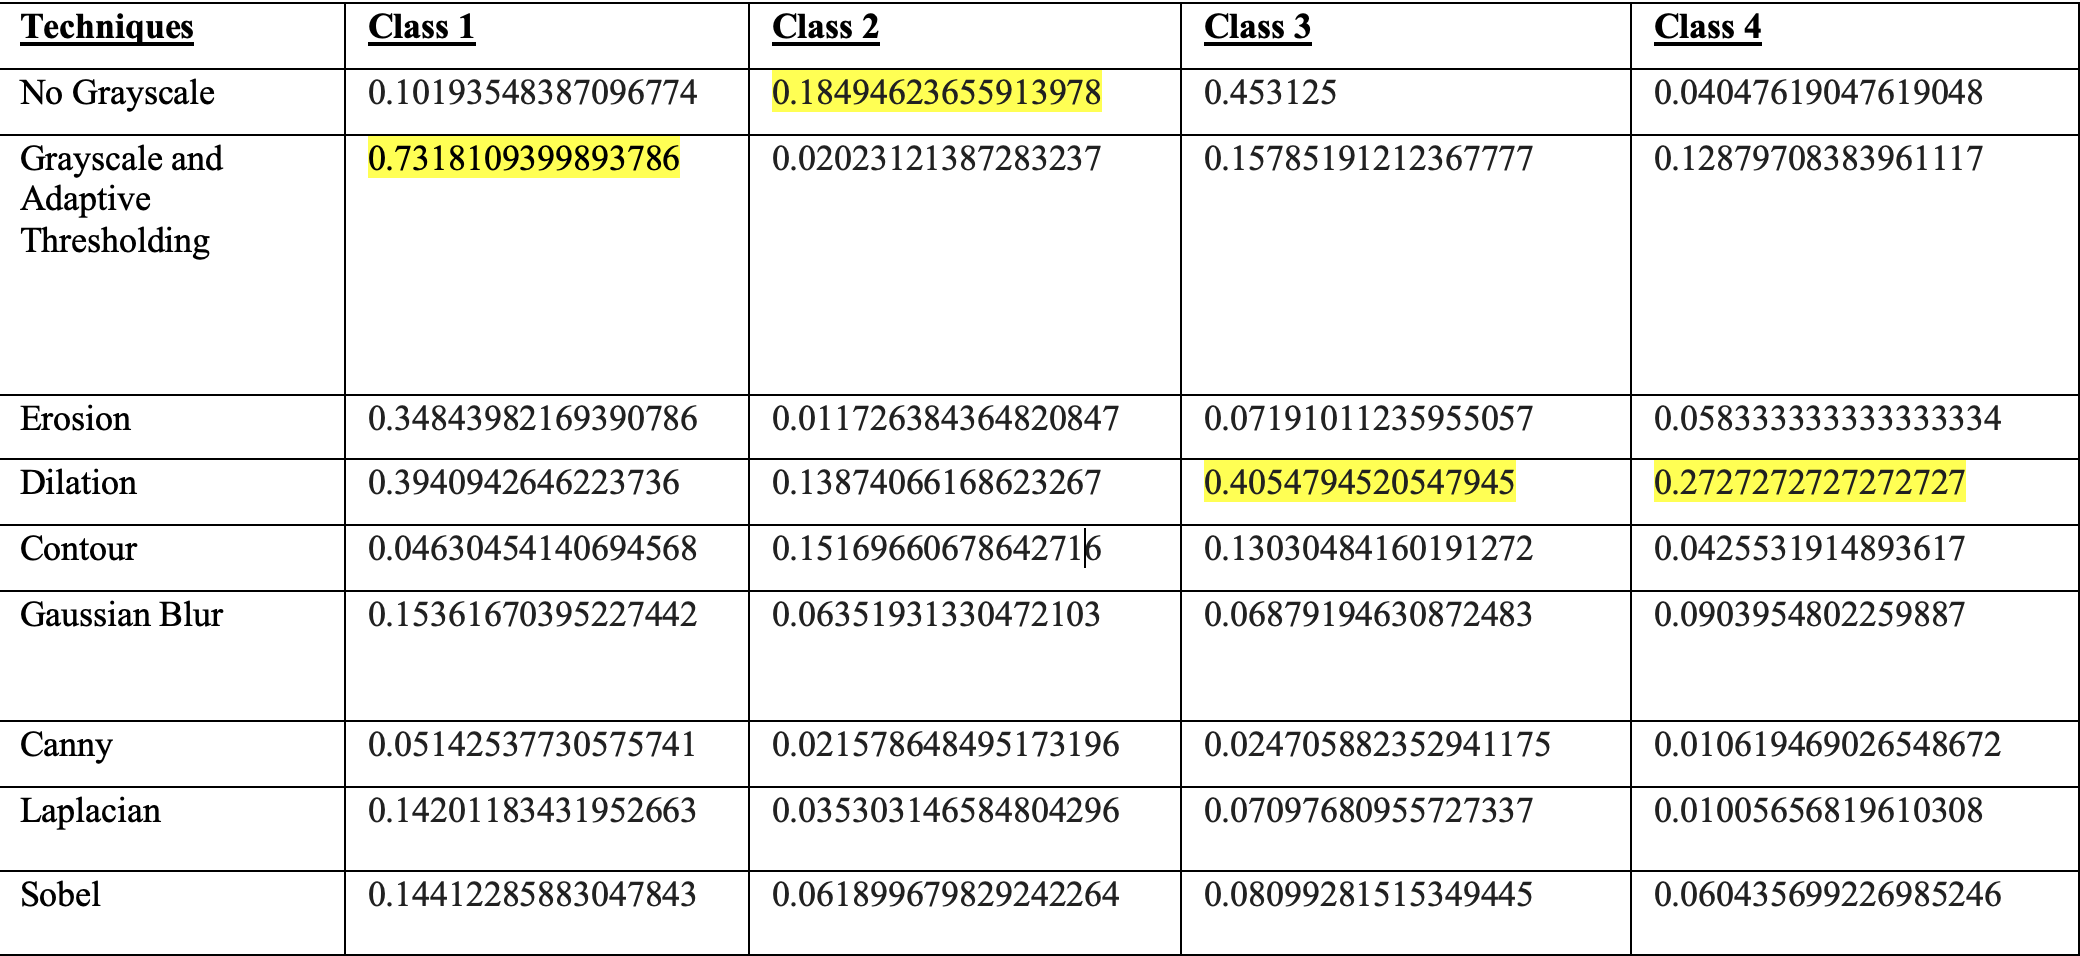




#**---> END OF PRACTICAL ASSESSMENT <---**